In [29]:
import mixsol as mx
import matplotlib.pyplot as plt

# Mixing between two endpoint solutions

We start by defining stock solutions that will eventually be mixed into our target solutions

In [30]:
stock_solutions = [
    mx.Solution(
        solutes='FA_Pb_I3', #you can input the formula delimited by underscores
        solvent='DMF9_DMSO1', #for both solutes and solvents
        molarity=1,
        alias='FAPI' #the alias is optional, just makes outputs easier to read later
    ), 
    mx.Solution(
        solutes={
            'MA':1, 
            'Pb':1, 
            'I':3
            }, # you can also input the components as a dictionary
        solvent={
            "DMF": 9,
            "DMSO": 1
        },
        molarity=1,
        alias='MAPI'
    ),
]

These solutions can be linearly interpolated into a spread of target solutions

In [31]:
linear_targets = mx.interpolate(
    endpoints = stock_solutions,
    divisor=3, #divisor by which to split the endpoints by. 2 = 1/2, 3 = 1/3,2/3, etc.
    )
linear_targets

[<Solution> 1M FA_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.667_MA0.333_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.333_MA0.667_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M MA_Pb_I3 in DMF0.9_DMSO0.1]

Stock and target `Solution`s are passed into a `Mixer` object, which will calculate the solution transfers required to reach our target solutions

In [32]:
sm = mx.Mixer(
    stock_solutions = stock_solutions,  #a list of Solution's
    targets = {
        t:100 # the unit of volume is up to you, just keep it consistent 
        for t in linear_targets
        }, #dictionary of Solution:target volume
    )

In [33]:
sm.solve(
    min_volume=20, #minimum volume to transfer in a single mix. This usually is a pipette specification
    max_inputs = 4, #maximum number of source solutions that can be mixed into the target solution. higher numbers may drastically increase compute time
    strategy="least_inputs" #mixing strategy. least_inputs prefers mixing with the least # of source solutions, prefer_stock prioritizes mixing with stock solutions over other target solutions.
    )

### Displaying the results

We can print the mixing protocol in plain English for manual pipetting

In [34]:
sm.print()

===== Stock Prep =====
200.00 of FAPI
200.00 of MAPI
====== Mixing =====
Distribute FAPI:
	50.00 to 1M FA0.333_MA0.667_Pb_I3 in DMF0.9_DMSO0.1
	50.00 to 1M FA0.667_MA0.333_Pb_I3 in DMF0.9_DMSO0.1
Distribute MAPI:
	100.00 to 1M FA0.333_MA0.667_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA0.333_MA0.667_Pb_I3 in DMF0.9_DMSO0.1:
	50.00 to 1M FA0.667_MA0.333_Pb_I3 in DMF0.9_DMSO0.1


The mixing protocol can also be output as a list of nested dictionaries, which is more useful when feeding the mixing protocol to an automated system (liquid handler, etc). Each dictionary key is a Solution object from the provided stock_solutions or targets. The output format is:
```
[       #list, where each entry represents a mixing "generation"
    [       #list, where each entry represents liquid transfers from a single source
        {source1:       #source
            {
                destination:volume_to_transfer,     #destinations with volume to move from the source
            }
        },
        {source2:
            {
                destination:volume_to_transfer,
            }
        }
    ],
    [       #second generation of transfers. These will rely on some Solutions that were prepared in previous generations
        {source1:
            {
                destination:volume_to_transfer,
            }
        },
        {source3:
            {
                destination:volume_to_transfer,
            }
        }
    ],
]
```

In [74]:
sm.transfers_per_generation

[{<Solution> 1M Cs_Pb_I3 in DMF0.9_DMSO0.1: {<Solution> 1M FA0.4_Cs0.6_Pb_I3 in DMF0.9_DMSO0.1: 90.0,
   <Solution> 1M FA0.3_Cs0.7_Pb_I3 in DMF0.9_DMSO0.1: 105.0},
  <Solution> 1M FA_Pb_I3 in DMF0.9_DMSO0.1: {<Solution> 1M FA0.4_Cs0.6_Pb_I3 in DMF0.9_DMSO0.1: 60.0,
   <Solution> 1M FA0.3_Cs0.7_Pb_I3 in DMF0.9_DMSO0.1: 45.0}},
 {<Solution> 1M FA0.4_Cs0.6_Pb_I3 in DMF0.9_DMSO0.1: {<Solution> 1M FA0.35_Cs0.65_Pb_I3 in DMF0.9_DMSO0.1: 50.0},
  <Solution> 1M FA0.3_Cs0.7_Pb_I3 in DMF0.9_DMSO0.1: {<Solution> 1M FA0.35_Cs0.65_Pb_I3 in DMF0.9_DMSO0.1: 50.0}}]

Finally, we can plot the mixing protocol as a graph. In practice, this is useful to give you a high-level idea of how complicated the mixing protocol is. Each unique color represents a "generation" of mixing.

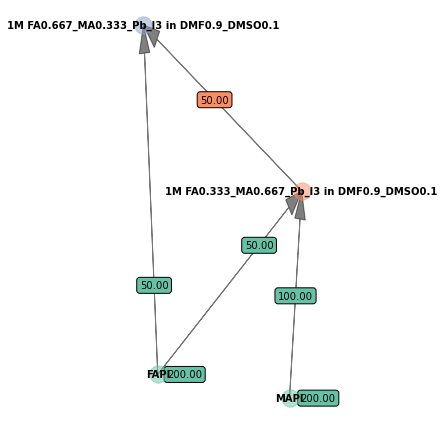

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
sm.plot(ax=ax)

## Interpolating between more than two endpoint solutions

In [3]:
stock_solutions = [
    mx.Solution(
        solutes='FA_Pb_I3', 
        solvent='DMF9_DMSO1',
        molarity=1,
    ), 
    mx.Solution(
        solutes="MA_Pb_I3",
        solvent='DMF9_DMSO1',
        molarity=1,
    ),
    mx.Solution(
        solutes="Cs_Pb_I3",
        solvent='DMF9_DMSO1',
        molarity=1,
    ),
]

In [4]:
linear_targets = mx.interpolate(
    endpoints = stock_solutions,
    divisor=4, #divisor by which to split the endpoints by. 2 = 1/2, 3 = 1/3,2/3, etc.
    )
linear_targets

[<Solution> 1M FA_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.75_MA0.25_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.25_FA0.75_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.5_MA0.5_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.25_FA0.5_MA0.25_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.5_FA0.5_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.25_MA0.75_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.25_FA0.25_MA0.5_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.5_FA0.25_MA0.25_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.75_FA0.25_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M MA_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.25_MA0.75_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.5_MA0.5_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs0.75_MA0.25_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs_Pb_I3 in DMF0.9_DMSO0.1]

In [5]:
sm = mx.Mixer(
    stock_solutions = stock_solutions, 
    targets = {
        t:100 # the unit of volume is up to you, just keep it consistent 
        for t in linear_targets
        }, #dictionary of Solution:volume
    )

In [6]:
sm.solve(
    min_volume=20, #minimum volume to transfer in a single mix. This usually is a pipette specification
    max_inputs = 4,
    strategy="least_inputs"
    )

In [7]:
sm.print()

===== Stock Prep =====
500.00 of 1M Cs_Pb_I3 in DMF0.9_DMSO0.1
500.00 of 1M FA_Pb_I3 in DMF0.9_DMSO0.1
500.00 of 1M MA_Pb_I3 in DMF0.9_DMSO0.1
====== Mixing =====
Distribute 1M Cs_Pb_I3 in DMF0.9_DMSO0.1:
	33.33 to 1M Cs0.25_FA0.75_Pb_I3 in DMF0.9_DMSO0.1
	50.00 to 1M Cs0.5_FA0.5_Pb_I3 in DMF0.9_DMSO0.1
	25.00 to 1M Cs0.25_FA0.25_MA0.5_Pb_I3 in DMF0.9_DMSO0.1
	100.00 to 1M Cs0.5_MA0.5_Pb_I3 in DMF0.9_DMSO0.1
	66.67 to 1M Cs0.75_FA0.25_Pb_I3 in DMF0.9_DMSO0.1
	75.00 to 1M Cs0.5_FA0.25_MA0.25_Pb_I3 in DMF0.9_DMSO0.1
	50.00 to 1M Cs0.75_MA0.25_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA_Pb_I3 in DMF0.9_DMSO0.1:
	100.00 to 1M Cs0.25_FA0.75_Pb_I3 in DMF0.9_DMSO0.1
	50.00 to 1M Cs0.5_FA0.5_Pb_I3 in DMF0.9_DMSO0.1
	150.00 to 1M FA0.5_MA0.5_Pb_I3 in DMF0.9_DMSO0.1
	25.00 to 1M Cs0.25_FA0.25_MA0.5_Pb_I3 in DMF0.9_DMSO0.1
	75.00 to 1M FA0.75_MA0.25_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M MA_Pb_I3 in DMF0.9_DMSO0.1:
	150.00 to 1M FA0.5_MA0.5_Pb_I3 in DMF0.9_DMSO0.1
	50.00 to 1M Cs0.25_FA0.25_MA0.5_Pb_

Logarithmic series of mixes between two endpoints

In [36]:
import numpy as np

In [37]:
stock_solutions = [
    mx.Solution(
        solutes='FA_Pb_I3', 
        solvent='DMF9_DMSO1',
        molarity=1,
    ), 
    mx.Solution(
        solutes="Cs_Pb_I3",
        solvent='DMF9_DMSO1',
        molarity=1,
    ),
]

In [58]:
target_solutions = []
for cs_loading in np.logspace(-4, 0, 8):
    target_solutions.append(
        mx.Solution(
            solutes={
                "FA": 1-cs_loading,
                "Cs": cs_loading,
                "Pb": 1,
                "I": 3
            },
            solvent='DMF9_DMSO1',
            molarity=1,
        )
    )
target_solutions

[<Solution> 1M FA1_Cs0.0001_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA1_Cs0.000373_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.999_Cs0.00139_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.995_Cs0.00518_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.981_Cs0.0193_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.928_Cs0.072_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M FA0.732_Cs0.268_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M Cs_Pb_I3 in DMF0.9_DMSO0.1]

In [59]:
sm = mx.Mixer(
    stock_solutions = stock_solutions, 
    targets = {
        t:100 # the unit of volume is up to you, just keep it consistent 
        for t in target_solutions
        }, #dictionary of Solution:volume
    )

In [60]:
sm.solve(
    min_volume=20, #minimum volume to transfer in a single mix. This usually is a pipette specification
    max_inputs = 4,
    strategy="least_inputs"
    )

In [61]:
sm.print()

===== Stock Prep =====
136.66 of 1M Cs_Pb_I3 in DMF0.9_DMSO0.1
663.34 of 1M FA_Pb_I3 in DMF0.9_DMSO0.1
====== Mixing =====
Distribute 1M Cs_Pb_I3 in DMF0.9_DMSO0.1:
	100.00 to 1M Cs_Pb_I3 in DMF0.9_DMSO0.1
	36.66 to 1M FA0.732_Cs0.268_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA_Pb_I3 in DMF0.9_DMSO0.1:
	99.99 to 1M FA0.732_Cs0.268_Pb_I3 in DMF0.9_DMSO0.1
	99.96 to 1M FA0.928_Cs0.072_Pb_I3 in DMF0.9_DMSO0.1
	99.86 to 1M FA0.981_Cs0.0193_Pb_I3 in DMF0.9_DMSO0.1
	99.48 to 1M FA0.995_Cs0.00518_Pb_I3 in DMF0.9_DMSO0.1
	98.07 to 1M FA0.999_Cs0.00139_Pb_I3 in DMF0.9_DMSO0.1
	92.80 to 1M FA1_Cs0.000373_Pb_I3 in DMF0.9_DMSO0.1
	73.17 to 1M FA1_Cs0.0001_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA0.732_Cs0.268_Pb_I3 in DMF0.9_DMSO0.1:
	36.65 to 1M FA0.928_Cs0.072_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA0.928_Cs0.072_Pb_I3 in DMF0.9_DMSO0.1:
	36.61 to 1M FA0.981_Cs0.0193_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA0.981_Cs0.0193_Pb_I3 in DMF0.9_DMSO0.1:
	36.47 to 1M FA0.995_Cs0.00518_Pb_I3 in DMF0.9_DMSO0.1

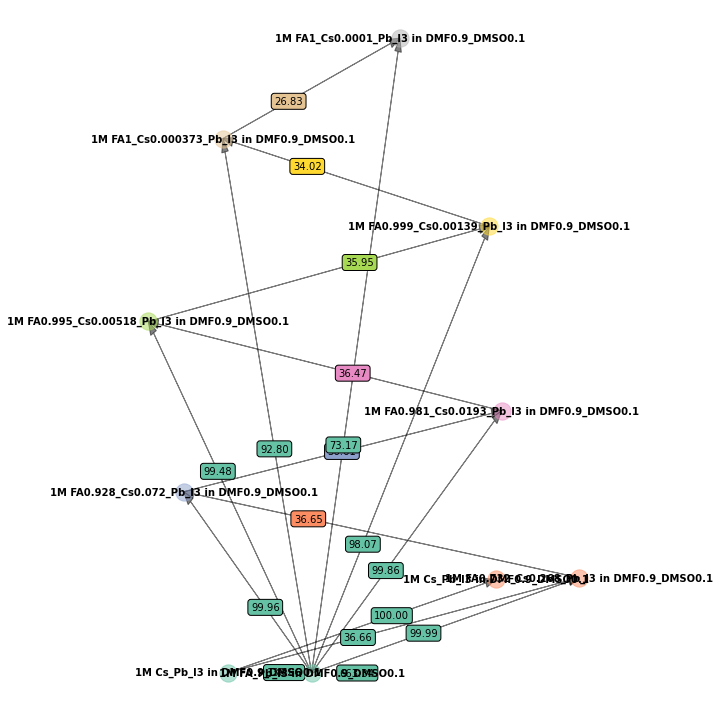

In [62]:
sm.plot()

## Mixing endpoints into arbitrary solutions

In [63]:
stock_solutions = [
    mx.Solution(
        solutes='FA_Pb_I3', 
        solvent='DMF9_DMSO1',
        molarity=1,
    ), 
    mx.Solution(
        solutes="Cs_Pb_I3",
        solvent='DMF9_DMSO1',
        molarity=1,
    ),
]

In [64]:
target_solutions = [
    mx.Solution(
        solutes='FA0.3_Cs0.7_Pb_I3', 
        solvent='DMF9_DMSO1',
        molarity=1,
    ), 
    mx.Solution(
        solutes="FA0.35_Cs0.65_Pb_I3",
        solvent='DMF9_DMSO1',
        molarity=1,
    ),
     mx.Solution(
        solutes="FA0.4_Cs0.6_Pb_I3",
        solvent='DMF9_DMSO1',
        molarity=1,
    ),
]

In [65]:
sm = mx.Mixer(
    stock_solutions = stock_solutions, 
    targets = {
        t:100 # the unit of volume is up to you, just keep it consistent 
        for t in target_solutions
        }, #dictionary of Solution:volume
    )

In [66]:
sm.solve(
    min_volume=20, #minimum volume to transfer in a single mix. This usually is a pipette specification
    max_inputs = 4,
    strategy="least_inputs"
    )

In [67]:
sm.print()

===== Stock Prep =====
195.00 of 1M Cs_Pb_I3 in DMF0.9_DMSO0.1
105.00 of 1M FA_Pb_I3 in DMF0.9_DMSO0.1
====== Mixing =====
Distribute 1M Cs_Pb_I3 in DMF0.9_DMSO0.1:
	90.00 to 1M FA0.4_Cs0.6_Pb_I3 in DMF0.9_DMSO0.1
	105.00 to 1M FA0.3_Cs0.7_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA_Pb_I3 in DMF0.9_DMSO0.1:
	60.00 to 1M FA0.4_Cs0.6_Pb_I3 in DMF0.9_DMSO0.1
	45.00 to 1M FA0.3_Cs0.7_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA0.4_Cs0.6_Pb_I3 in DMF0.9_DMSO0.1:
	50.00 to 1M FA0.35_Cs0.65_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M FA0.3_Cs0.7_Pb_I3 in DMF0.9_DMSO0.1:
	50.00 to 1M FA0.35_Cs0.65_Pb_I3 in DMF0.9_DMSO0.1
